In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 27

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 27)             │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,367 (5.34 KB)

 Trainable params: 1,367 (5.34 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
50/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0256 - loss: 3.3402   
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0387 - loss: 3.3220 - val_accuracy: 0.1715 - val_loss: 3.1399
Epoch 2/1000
50/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1833 - loss: 3.0417
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1849 - loss: 3.0046 - val_accuracy: 0.2448 - val_loss: 2.4954
Epoch 3/1000
50/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2107 - loss: 2.4671
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2146 - loss: 2.4409 - val_accuracy: 0.3599 - val_loss: 2.1050
Epoch 4/1000
52/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2496 - loss: 2.1827
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8506 - loss: 0.5522 


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
[1.7113138e-04 1.7329945e-03 6.1708156e-12 9.9140236e-12 3.2203792e-05
 2.7140794e-07 2.4539351e-12 1.3341226e-12 3.3700022e-12 5.9484214e-12
 5.8055464e-02 6.1540335e-11 1.2397325e-03 5.0024191e-12 4.6299332e-12
 1.8759751e-12 3.3007323e-12 2.0315493e-03 3.1816608e-03 1.9149829e-12
 8.3069885e-03 5.0496515e-03 3.9027444e-12 9.1720313e-01 8.1997065e-12
 3.5074731e-11 2.9952282e-03]
23


# Confusion matrix

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


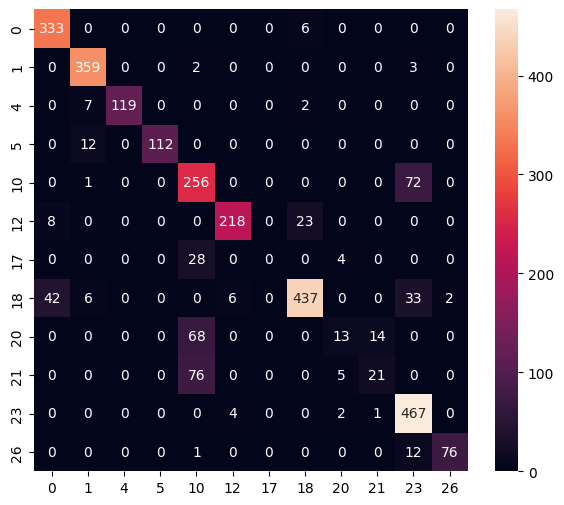

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       339
           1       0.93      0.99      0.96       364
           4       1.00      0.93      0.96       128
           5       1.00      0.90      0.95       124
          10       0.59      0.78      0.67       329
          12       0.96      0.88      0.91       249
          17       0.00      0.00      0.00        32
          18       0.93      0.83      0.88       526
          20       0.54      0.14      0.22        95
          21       0.58      0.21      0.30       102
          23       0.80      0.99      0.88       474
          26       0.97      0.85      0.91        89

    accuracy                           0.85      2851
   macro avg       0.77      0.71      0.71      2851
weighted avg       0.84      0.85      0.83      2851



c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmpe4pwyt96\assets


INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmpe4pwyt96\assets


Saved artifact at 'C:\Users\Admin\AppData\Local\Temp\tmpe4pwyt96'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 27), dtype=tf.float32, name=None)
Captures:
  2693817856416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2693817858880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2693863878720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2693866427312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2693883332384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2693883332912: TensorSpec(shape=(), dtype=tf.resource, name=None)


7568

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.7113153e-04 1.7329953e-03 6.1708264e-12 9.9140227e-12 3.2203792e-05
 2.7140820e-07 2.4539396e-12 1.3341225e-12 3.3700022e-12 5.9484553e-12
 5.8055408e-02 6.1540446e-11 1.2397330e-03 5.0024186e-12 4.6299414e-12
 1.8759820e-12 3.3007384e-12 2.0315493e-03 3.1816636e-03 1.9149827e-12
 8.3069885e-03 5.0496515e-03 3.9027592e-12 9.1720313e-01 8.1997525e-12
 3.5074731e-11 2.9952310e-03]
23
